In [1]:
%matplotlib
%matplotlib inline

import sys
# update with your path
# All the jupyter notebooks in the repository already have this
sys.path.append("/home/max/pytorch-segmentation-detection")
sys.path.insert(0, '/home/max/pytorch-segmentation-detection/vision/')
import pytorch_segmentation_detection.models.fcn as fcns

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

Using matplotlib backend: Qt5Agg


In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


#class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2,2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.conv3 = nn.Conv2d(16,120,5)
#         self.conv4 = nn.Conv2d(120,84,1)
#         self.conv5 = nn.Conv2d(84, 2, 1)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         x = self.conv5(x)
#         x = nn.functional.upsample_bilinear(x,size=(352,480))
#         return x
#net = Net()


In [3]:
import skimage.io as io

input_numpy = io.imread('cat.jpg').astype(np.float32)
labels_numpy = np.ascontiguousarray( io.imread('cat_annotation.png')[:, :, 0]).astype(np.long)
input_torch = torch.from_numpy(input_numpy)
transform = transforms.Normalize(mean = (0.485, 0.456, 0.406),std = (0.229, 0.224, 0.225))
input_torch = transform(input_torch)

inputs, labels = Variable(input_torch), Variable(torch.from_numpy(labels_numpy))

inputs = inputs.unsqueeze(0).permute(0, 3, 1, 2)

In [4]:
import torch.optim as optim
fcn = fcns.FCN_32s(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fcn.parameters(),lr=0.0001)

In [5]:
sum_loss = [0]*10
for i in range(10):
    #inputs, labels = Variable(torch.from_numpy(input_numpy)), Variable(torch.from_numpy(labels_numpy))
        
    optimizer.zero_grad()  
    outputs = fcn(inputs)
    outputs = outputs.view(352*480,-1)
    labels = labels.view(352*480,-1)
    labels = labels.squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    sum_loss[i]+=loss.data[0]
    print(i,' ', sum_loss[i])
        
print('Finished training')


0   0.6978559494018555
1   0.6907515525817871
2   0.6855136752128601
3   0.6732154488563538
4   0.6529331207275391
5   0.6124175786972046
6   0.5732307434082031
7   0.592664361000061
8   0.5424191355705261
9   0.5637835264205933
Finished training


In [6]:
fcn = fcn.eval()
outputs_2 = fcn(inputs)


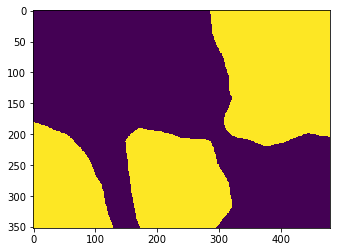

In [7]:
%matplotlib inline
outputs_2,indices = torch.max(outputs_2,1)
indices_2 = torch.squeeze(indices.data)
indices_2 = indices_2.numpy()
indices_2 = np.reshape(indices_2,(352,480))
plt.imshow(indices_2)

In [8]:
indices.shape


(1, 1, 352, 480)

In [13]:
input_numpy.shape

(352, 480, 3)

In [26]:
inputs = inputs.unsqueeze(0)

In [27]:
inputs = inputs.permute(0, 3, 1, 2)

In [ ]:
outputs = net(inputs)

In [31]:
inputs

Variable containing:
( 0 ,.,.) = 
  102  101  106
  120  119  124
  118  117  122
       ⋮       
  171  187  212
  173  189  214
  174  190  215

( 1 ,.,.) = 
  102  101  106
  114  113  118
  129  128  133
       ⋮       
  173  189  214
  175  191  216
  176  192  217

( 2 ,.,.) = 
   97   96  101
   95   94   99
  132  131  136
       ⋮       
  175  191  216
  176  192  217
  178  194  219
... 

(349,.,.) = 
  136  138  159
  127  129  150
  120  122  143
       ⋮       
   46   47   49
   47   49   48
   47   49   48

(350,.,.) = 
  130  135  157
  118  123  145
  110  115  137
       ⋮       
   40   44   45
   39   43   42
   39   43   42

(351,.,.) = 
  122  126  151
  109  113  138
  102  107  129
       ⋮       
   54   58   59
   48   52   53
   47   51   50
[torch.FloatTensor of size 352x480x3]

In [55]:
torch.from_numpy(input_numpy)


( 0 ,.,.) = 
  102  101  106
  120  119  124
  118  117  122
       ⋮       
  171  187  212
  173  189  214
  174  190  215

( 1 ,.,.) = 
  102  101  106
  114  113  118
  129  128  133
       ⋮       
  173  189  214
  175  191  216
  176  192  217

( 2 ,.,.) = 
   97   96  101
   95   94   99
  132  131  136
       ⋮       
  175  191  216
  176  192  217
  178  194  219
... 

(349,.,.) = 
  136  138  159
  127  129  150
  120  122  143
       ⋮       
   46   47   49
   47   49   48
   47   49   48

(350,.,.) = 
  130  135  157
  118  123  145
  110  115  137
       ⋮       
   40   44   45
   39   43   42
   39   43   42

(351,.,.) = 
  122  126  151
  109  113  138
  102  107  129
       ⋮       
   54   58   59
   48   52   53
   47   51   50
[torch.ByteTensor of size 352x480x3]

In [50]:
labels.size()

torch.Size([352, 480])

In [9]:
input_numpy.dtype

dtype('uint8')

In [37]:
outputs.size()

torch.Size([1, 10, 352, 480])

/home/max/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


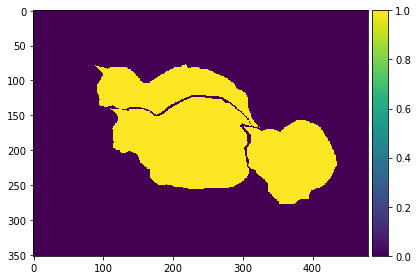

In [44]:
%matplotlib inline

io.imshow(labels_numpy[:, :, 1])

In [10]:
A = [[1,2,3],[2,3,4]]
A = torch.FloatTensor(A)

In [13]:
torch.max(A,0)

(
  2  3  4
 [torch.FloatTensor of size 1x3], 
  1  1  1
 [torch.LongTensor of size 1x3])